# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified yoru best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasks around handling class imbalance or about how to test multiple different models and tuning hyperparameters, but you should still look at doing those to see if they help you to create a better predictive model.

**Deliverables:** 
    For this project you will have two things you need to create, your predictions on the holdoutset and a notebook detailing your process.  


# Good Luck

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [1]:
import pandas as pd
import numpy as np

import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('movie_train.csv', index_col=0)

In [4]:
df.head()

,Release Year,Title,Plot,Director,Cast,Genre
10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


### Task #2: Check for missing values:

In [5]:
df.info()

#there aren't any in the relevant columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 10281 to 3583
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  10682 non-null  int64 
 1   Title         10682 non-null  object
 2   Plot          10682 non-null  object
 3   Director      10682 non-null  object
 4   Cast          10513 non-null  object
 5   Genre         10682 non-null  object
dtypes: int64(1), object(5)
memory usage: 584.2+ KB


### Task #3: Remove NaN values:

In [6]:
# assess plot lengths (min and max)

df['Plot Len'] = df['Plot'].str.len()

df.sort_values('Plot Len')

,Release Year,Title,Plot,Director,Cast,Genre,Plot Len
24876,1973,Chhalia,Chhalia is a family thriller.,Mukul Dutt,"Navin Nischol, Nanda, Shatrughan Sinha",action,29
6210,1954,They Were So Young,"""A beach near Rio de Janeiro"".",Kurt Neumann,"Raymond Burr, Scott Brady, Johanna Matz",drama,30
7382,1960,Noose for a Gunman,A gunman takes on a corrupt land baron.,Edward L. Cahn,"Jim Davis, Lyn Thomas",western,39
4075,1945,A Medal for Benny,The film examines small town hypocrisy.,Irving Pichel,"Dorothy Lamour, Arturo de Córdova",drama,39
25919,1997,Suraj,Suraj is an Action film for Mithun Fans.,T.L.V. Prasad,"Rakesh Bedi, Mithun Chakraborty, Puneet Issar",action,40
...,...,...,...,...,...,...,...
31250,2014,Anjaan,A handicapped man named Krishna (Suriya) arriv...,Lingusamy,"Suriya, Samantha, Vidyut Jamwal, Manoj Bajpai",action,14242
3592,1943,Isle of Forgotten Sins,Somewhere on one of the English-speaking South...,Edgar G. Ulmer,"Gale Sondergaard, John Carradine",adventure,15046
3009,1941,Broadway Limited,"Following the screening of her latest film ""Th...",Gordon Douglas,"Victor McLaglen, Patsy Kelly, ZaSu Pitts",comedy,16517
23223,1987,Sworn Brothers,"When Lam Ting-yat was little, his father died ...",David Lai,"Andy Lau, Cheung Kwok Keung",crime,16636


In [7]:
df.groupby('Genre').count()

,Release Year,Title,Plot,Director,Cast,Plot Len
Genre,,,,,,
action,830,830,830,830,823,830
adventure,331,331,331,331,329,331
comedy,2724,2724,2724,2724,2703,2724
crime,328,328,328,328,326,328
drama,3770,3770,3770,3770,3673,3770
horror,840,840,840,840,810,840
romance,649,649,649,649,644,649
thriller,685,685,685,685,680,685
western,525,525,525,525,525,525


### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. This will consists of you cleaning up the data set by doing things like removing stop words, tokenizing, and/or lemitizing words. 

In [8]:
min_movies_of_a_given_genre_attributed_to_a_director = 10

In [9]:
action = df[df['Genre'] == 'action'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'action'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
action_directors = list(action.index)
action_directors

adventure = df[df['Genre'] == 'adventure'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'adventure'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
adventure_directors = list(adventure.index)
adventure_directors

comedy = df[df['Genre'] == 'comedy'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'comedy'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
comedy_directors = list(comedy.index)
comedy_directors

crime = df[df['Genre'] == 'crime'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'crime'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
crime_directors = list(crime.index)
crime_directors

drama = df[df['Genre'] == 'drama'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'drama'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
drama_directors = list(drama.index)
drama_directors

horror = df[df['Genre'] == 'horror'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'horror'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
horror_directors = list(horror.index)
horror_directors

romance = df[df['Genre'] == 'romance'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'romance'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
romance_directors = list(romance.index)
romance_directors

thriller = df[df['Genre'] == 'thriller'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'thriller'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
thriller_directors = list(thriller.index)
thriller_directors

western = df[df['Genre'] == 'western'].groupby('Director').count().sort_values('Release Year', ascending = False)[df[df['Genre'] == 'western'].groupby('Director').count().sort_values('Release Year', ascending = False)['Release Year'] > min_movies_of_a_given_genre_attributed_to_a_director]
western_directors = list(western.index)
western_directors

print(len(action_directors), len(adventure_directors), len(comedy_directors), len(crime_directors),
      len(drama_directors), len(horror_directors), len(romance_directors), len(thriller_directors),
      len(western_directors))


1 0 10 0 5 2 0 0 2


I thought that the directors might be a useful feature, but there are only 20 directors with 10 or more credits in a given genre.

#### Tokenizer

In [10]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")

for i in df.index:
    df['Plot'][i] = tokenizer.tokenize(df['Plot'][i])


<ipython-input-10-48bbe6e5c7c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'][i] = tokenizer.tokenize(df['Plot'][i])


In [11]:
sw = stopwords.words('english')
sw.append('film')

for i in df.index:
    df['Plot'][i] = [word.lower() for word in df['Plot'][i]]
    df['Plot'][i] = [word for word in df['Plot'][i] if word not in sw]

<ipython-input-11-6666b5cb84d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'][i] = [word.lower() for word in df['Plot'][i]]
<ipython-input-11-6666b5cb84d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'][i] = [word for word in df['Plot'][i] if word not in sw]


#### Stemming:

In [12]:
# p_stemmer = nltk.stem.PorterStemmer()
# s_stemmer = nltk.stem.SnowballStemmer(language="english")

In [13]:
# a = 0
# for i in df.index:
#     df['Plot'][i] = [p_stemmer.stem(word) for word in df['Plot'][i]]
#     a += 1
#     print(a)

#### Lemmatizing: 

In [14]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [15]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\clare\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [16]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\clare\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
df['Plot Tagged'] = df['Plot']

for i in df.index:
    df['Plot Tagged'][i] = pos_tag(df['Plot'][i])


<ipython-input-18-9d963c7988ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Tagged'][i] = pos_tag(df['Plot'][i])


In [19]:
for i in df.index:
    df['Plot Tagged'][i] = [(word[0], get_wordnet_pos(word[1])) for word in df['Plot Tagged'][i]]


<ipython-input-19-ef0157add60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Tagged'][i] = [(word[0], get_wordnet_pos(word[1])) for word in df['Plot Tagged'][i]]


In [20]:
for i in df.index:
    df['Plot'][i] = [lemmatizer.lemmatize(word[0], word[1]) for word in df['Plot Tagged'][i]]


<ipython-input-20-c510e8a7c89f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'][i] = [lemmatizer.lemmatize(word[0], word[1]) for word in df['Plot Tagged'][i]]


In [21]:
for i in df.index:
    df['Plot'][i] = ' '.join([str(elem) for elem in df['Plot'][i]])

df.head()


<ipython-input-21-1ab0229b7247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot'][i] = ' '.join([str(elem) for elem in df['Plot'][i]])


,Release Year,Title,Plot,Director,Cast,Genre,Plot Len,Plot Tagged
10281,1984,Silent Madness,computer error lead accidental release homicid...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror,175,"[(computer, n), (error, n), (leads, v), (accid..."
7341,1960,Desire in the Dust,lonnie wilson ken scott son sharecropper zuba ...,Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama,1374,"[(lonnie, n), (wilson, n), (ken, v), (scott, a..."
10587,1986,On the Edge,gaunt bushy beard year old wes holman return n...,Rob Nilsson,"Bruce Dern, Pam Grier",drama,839,"[(gaunt, n), (bushy, n), (bearded, v), (year, ..."
25495,1988,Ram-Avtar,ram avtar childhood best friend difference two...,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama,857,"[(ram, n), (avtar, n), (childhood, n), (best, ..."
16607,2013,Machete Kills,machete cortez danny trejo sartana rivera jess...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action,4428,"[(machete, a), (cortez, n), (danny, n), (trejo..."


### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [22]:
features = 'Plot'
target = 'Genre'

In [61]:
X = df[features]
y = df[target]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

### Task #6: Build a pipeline to vectorize the data, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [26]:
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.pipeline import Pipeline

#### Pipeline 1

In [28]:
pipeline_1 = Pipeline([
                       ('vec', CountVectorizer(max_df=0.35, min_df=10)),
                       ('mnb', MultinomialNB())
                      ])

In [29]:
pipeline_1.fit(X_train, y_train)


Pipeline(steps=[('vec', CountVectorizer(max_df=0.35, min_df=10)),
                ('mnb', MultinomialNB())])

In [30]:
pipeline_1.score(X_train, y_train)

0.7343475716793446

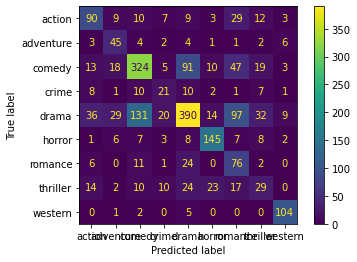

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(pipeline_1, X_test, y_test)

In [32]:
print(classification_report(y_test, pipeline_1.predict(X_test)))

              precision    recall  f1-score   support

      action       0.53      0.52      0.52       172
   adventure       0.41      0.66      0.50        68
      comedy       0.64      0.61      0.62       530
       crime       0.30      0.34      0.32        61
       drama       0.69      0.51      0.59       758
      horror       0.73      0.78      0.75       187
     romance       0.28      0.63      0.38       120
    thriller       0.26      0.22      0.24       129
     western       0.81      0.93      0.87       112

    accuracy                           0.57      2137
   macro avg       0.52      0.58      0.53      2137
weighted avg       0.60      0.57      0.58      2137



#### Pipeline 2

In [33]:
from sklearn.linear_model import LogisticRegression


In [34]:
pipeline_2 = Pipeline([
                       ('vec', TfidfVectorizer(max_df=0.35, min_df=.03)),
                       ('lnr', LogisticRegression(random_state = 24, max_iter = 5000))
                      ])

In [35]:
pipeline_2.fit(X_train, y_train)
pipeline_2.score(X_train, y_train)

0.6538326506729082

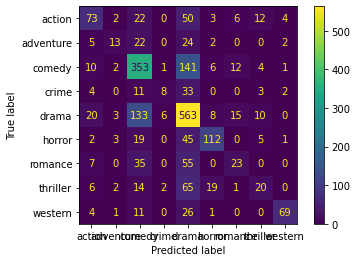

In [36]:
plot_confusion_matrix(pipeline_2, X_test, y_test)

In [37]:
print(classification_report(y_test, pipeline_2.predict(X_test)))

              precision    recall  f1-score   support

      action       0.56      0.42      0.48       172
   adventure       0.50      0.19      0.28        68
      comedy       0.57      0.67      0.61       530
       crime       0.47      0.13      0.21        61
       drama       0.56      0.74      0.64       758
      horror       0.74      0.60      0.66       187
     romance       0.40      0.19      0.26       120
    thriller       0.37      0.16      0.22       129
     western       0.87      0.62      0.72       112

    accuracy                           0.58      2137
   macro avg       0.56      0.41      0.45      2137
weighted avg       0.57      0.58      0.56      2137



#### Implement Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

grid = {'vec__max_df':[0.95, 0.75, 0.55, 0.35, 0.15], 
        'vec__min_df':[0.01, 0.05, 0.1], 
        'lnr__class_weight': ['balanced', None]}

grid_p2=GridSearchCV(estimator = pipeline_2,
                     param_grid = grid,
                     cv=5, 
                     scoring='f1_weighted', 
                     verbose=1, 
                     n_jobs=-1)

grid_p2.fit(X_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   58.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec',
                                        TfidfVectorizer(max_df=0.35,
                                                        min_df=0.03)),
                                       ('lnr',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=24))]),
             n_jobs=-1,
             param_grid={'lnr__class_weight': ['balanced', None],
                         'vec__max_df': [0.95, 0.75, 0.55, 0.35, 0.15],
                         'vec__min_df': [0.01, 0.05, 0.1]},
             scoring='f1_weighted', verbose=1)

0.5452101326516529
{'lnr__class_weight': None, 'vec__max_df': 0.95, 'vec__min_df': 0.01}
Pipeline(steps=[('vec', TfidfVectorizer(max_df=0.95, min_df=0.01)),
                ('lnr', LogisticRegression(max_iter=5000, random_state=24))])
              precision    recall  f1-score   support

      action       0.75      0.58      0.66       658
   adventure       0.80      0.39      0.53       263
      comedy       0.73      0.78      0.76      2194
       crime       0.83      0.28      0.42       267
       drama       0.65      0.86      0.75      3012
      horror       0.85      0.79      0.82       653
     romance       0.82      0.41      0.54       529
    thriller       0.75      0.33      0.46       556
     western       0.92      0.81      0.86       413

    accuracy                           0.72      8545
   macro avg       0.79      0.58      0.64      8545
weighted avg       0.73      0.72      0.70      8545

              precision    recall  f1-score   support

     

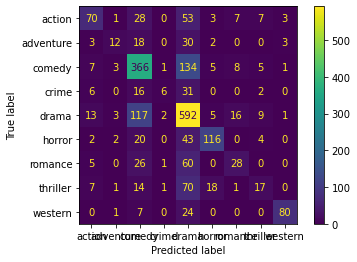

In [39]:
print(grid_p2.best_score_)
print(grid_p2.best_params_)
print(grid_p2.best_estimator_)

plot_confusion_matrix(grid_p2, X_test, y_test)

print(classification_report(y_train, grid_p2.predict(X_train)))
print(classification_report(y_test, grid_p2.predict(X_test)))

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [40]:
# Included above
# Best Model: pipeline_2 with hypterparamenters indictated by GridSearch

### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [41]:
final_model = Pipeline([
                       ('vec', TfidfVectorizer(max_df=0.95, min_df=.01)),
                       ('lnr', LogisticRegression(random_state = 24, max_iter = 5000))
                      ])

In [42]:
final_model.fit(X, y)

Pipeline(steps=[('vec', TfidfVectorizer(max_df=0.95, min_df=0.01)),
                ('lnr', LogisticRegression(max_iter=5000, random_state=24))])

In [43]:
print(classification_report(y, final_model.predict(X)))

              precision    recall  f1-score   support

      action       0.74      0.60      0.66       830
   adventure       0.78      0.40      0.53       331
      comedy       0.73      0.78      0.76      2724
       crime       0.79      0.28      0.41       328
       drama       0.66      0.87      0.75      3770
      horror       0.84      0.81      0.82       840
     romance       0.77      0.40      0.52       649
    thriller       0.76      0.32      0.45       685
     western       0.90      0.81      0.85       525

    accuracy                           0.72     10682
   macro avg       0.77      0.58      0.64     10682
weighted avg       0.73      0.72      0.71     10682



In [44]:
df_test = pd.read_csv('movie_test.csv', index_col=0)

In [45]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")

for i in df_test.index:
    df_test['Plot'][i] = tokenizer.tokenize(df_test['Plot'][i])

<ipython-input-45-a8c0cd8e3cc5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot'][i] = tokenizer.tokenize(df_test['Plot'][i])


In [46]:
sw = stopwords.words('english')
sw.append('film')

for i in df_test.index:
    df_test['Plot'][i] = [word.lower() for word in df_test['Plot'][i]]
    df_test['Plot'][i] = [word for word in df_test['Plot'][i] if word not in sw]

<ipython-input-46-62f0ef5aa4c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot'][i] = [word.lower() for word in df_test['Plot'][i]]
<ipython-input-46-62f0ef5aa4c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot'][i] = [word for word in df_test['Plot'][i] if word not in sw]


In [47]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [48]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [49]:
df_test['Plot Tagged'] = df_test['Plot']

for i in df_test.index:
    df_test['Plot Tagged'][i] = pos_tag(df_test['Plot'][i])

<ipython-input-49-caa3b11c4c13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot Tagged'][i] = pos_tag(df_test['Plot'][i])


In [50]:
for i in df_test.index:
    df_test['Plot Tagged'][i] = [(word[0], get_wordnet_pos(word[1])) for word in df_test['Plot Tagged'][i]]

<ipython-input-50-fcc44d281368>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot Tagged'][i] = [(word[0], get_wordnet_pos(word[1])) for word in df_test['Plot Tagged'][i]]


In [51]:
for i in df_test.index:
    df_test['Plot'][i] = [lemmatizer.lemmatize(word[0], word[1]) for word in df_test['Plot Tagged'][i]]

<ipython-input-51-6c3a7e5cd93c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot'][i] = [lemmatizer.lemmatize(word[0], word[1]) for word in df_test['Plot Tagged'][i]]


In [52]:
for i in df_test.index:
    df_test['Plot'][i] = ' '.join([str(elem) for elem in df_test['Plot'][i]])

<ipython-input-52-eb83e311594c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Plot'][i] = ' '.join([str(elem) for elem in df_test['Plot'][i]])


In [59]:
features = 'Plot'
X_holdout = df_test[features]

In [60]:
predictions = final_model.predict(X_holdout)

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

In [55]:
answers = pd.DataFrame(predictions)
answers.index = df_test.index

In [56]:
answers.to_csv('nlp_preds_claredunne.csv', index = True)

## Great job!